In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
test=pd.read_csv('test.csv')
train=pd.read_csv('spaceship_titanic.csv')

In [7]:
test.sample(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
3209,7035_01,Earth,True,F/1342/S,PSO J318.5-22,25.0,False,0.0,0.0,0.0,0.0,0.0,Verly Workmans
1035,2169_01,Earth,False,G/350/P,TRAPPIST-1e,56.0,False,0.0,0.0,0.0,147.0,872.0,Evaley Gaineyerson
576,1196_01,Mars,False,F/240/P,TRAPPIST-1e,28.0,False,1789.0,0.0,597.0,0.0,120.0,Warets Panie
2192,4742_01,Mars,False,F/894/S,TRAPPIST-1e,29.0,False,1071.0,27.0,58.0,0.0,0.0,Rantax Sulie
3987,8690_02,Mars,False,D/263/S,TRAPPIST-1e,24.0,False,466.0,0.0,2257.0,6.0,0.0,Hule Peake
4179,9063_01,Europa,True,B/346/S,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Pollus Lansuffle
2015,4328_01,Earth,True,G/714/P,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Elene Larks
1598,3435_01,Earth,False,G/563/P,TRAPPIST-1e,20.0,False,43.0,0.0,9.0,707.0,7.0,Hery Birds
2346,5098_02,Earth,True,NaN,PSO J318.5-22,11.0,False,0.0,0.0,0.0,0.0,0.0,Sonald Kellyons
4166,9045_01,Mars,False,F/1850/P,TRAPPIST-1e,20.0,False,1016.0,0.0,140.0,132.0,0.0,Heats Blane


In [8]:
train.isna().sum()

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

In [9]:
train.isnull().sum()

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

<Axes: >

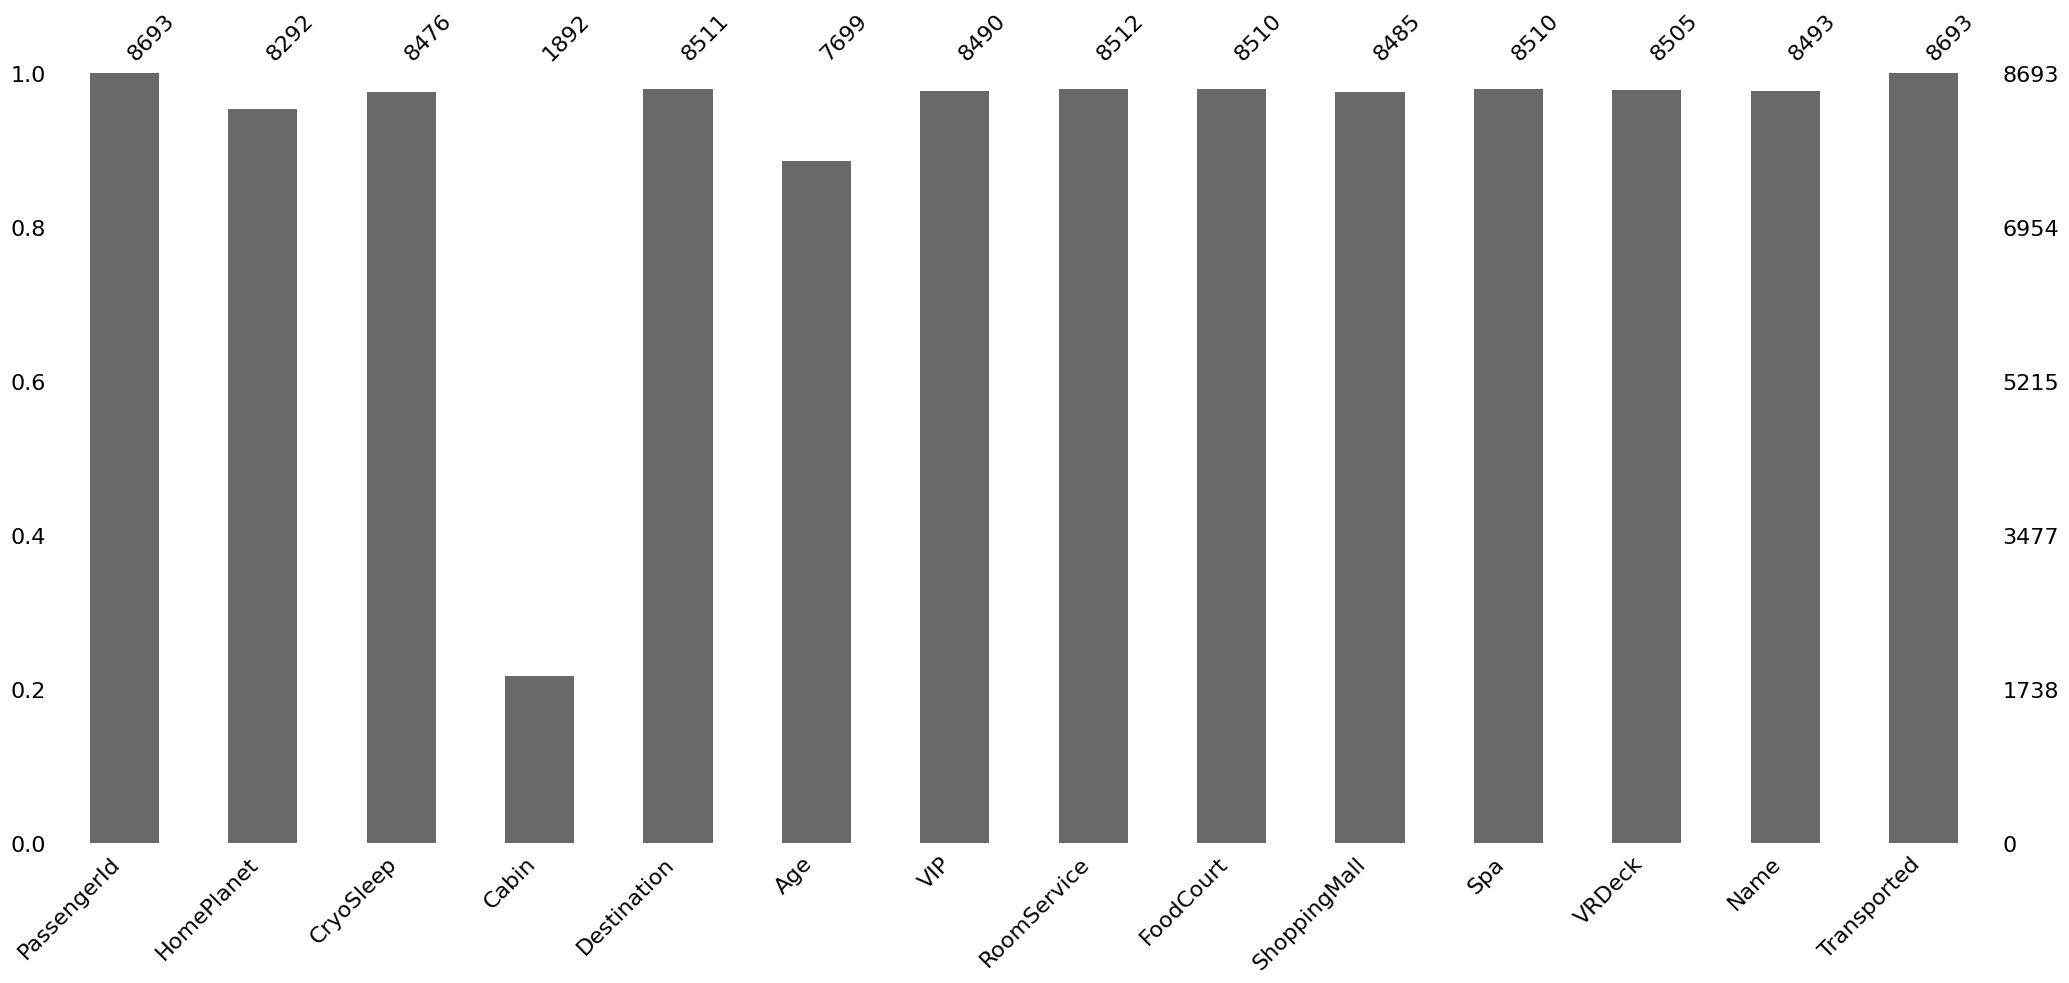

In [10]:
msno.bar(train)

<Axes: >

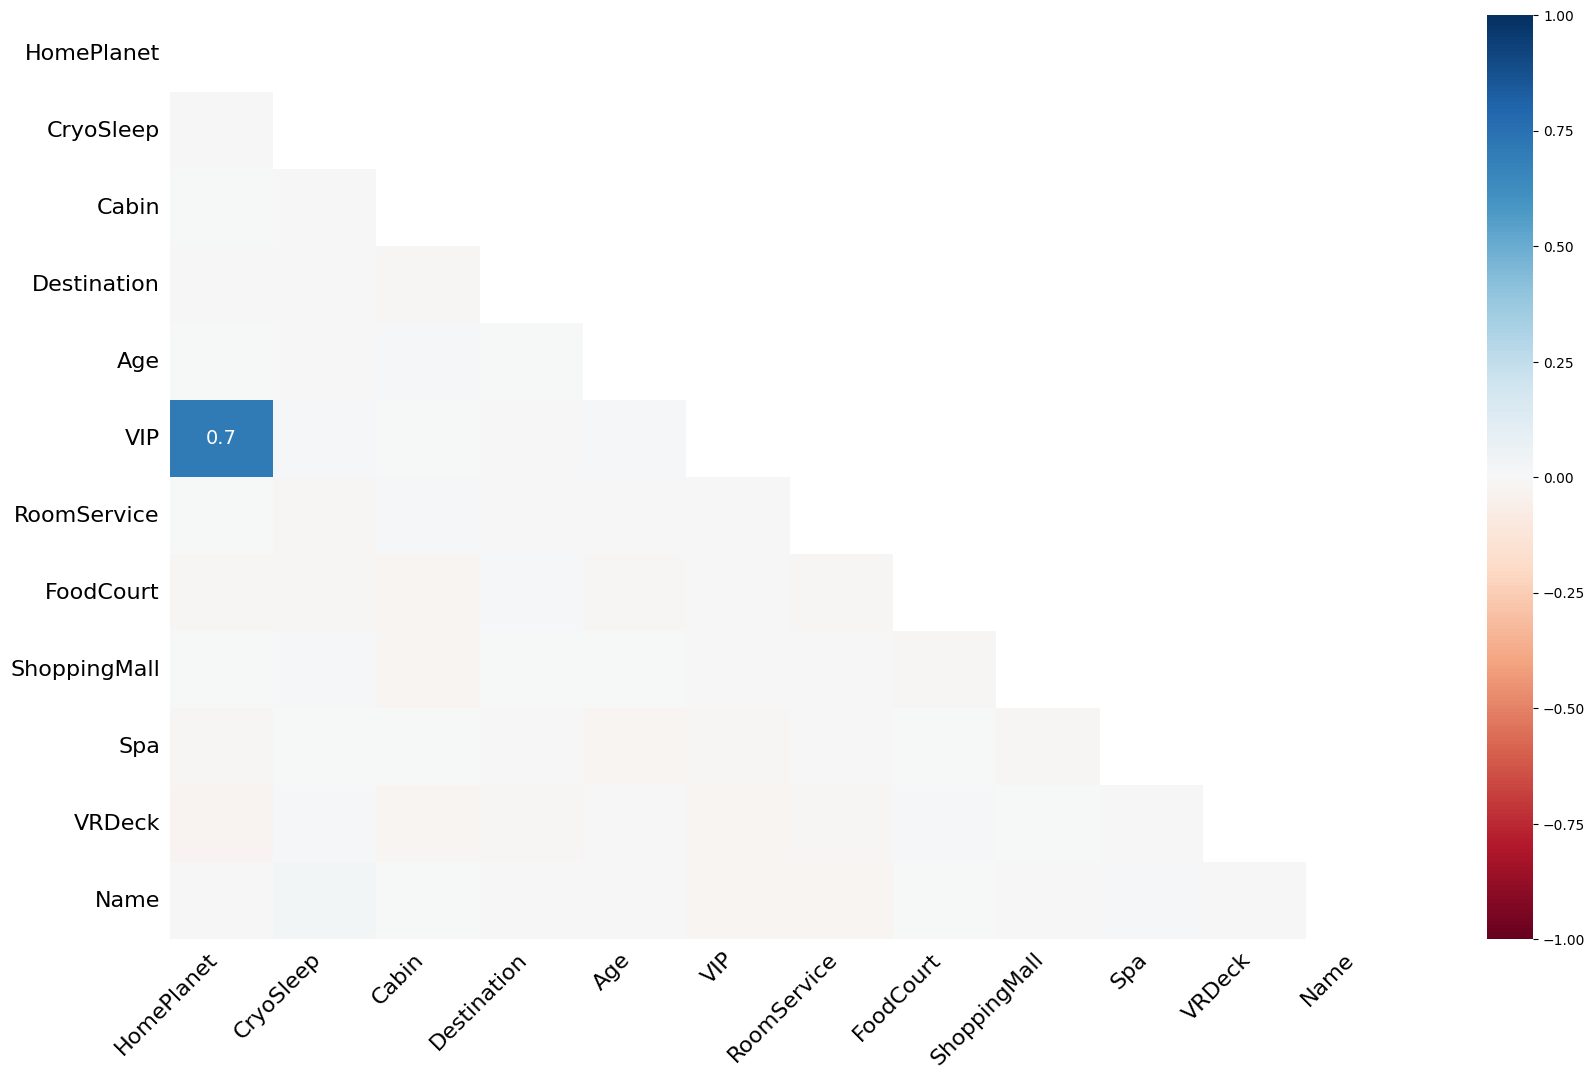

In [11]:
msno.heatmap(train)

<Axes: >

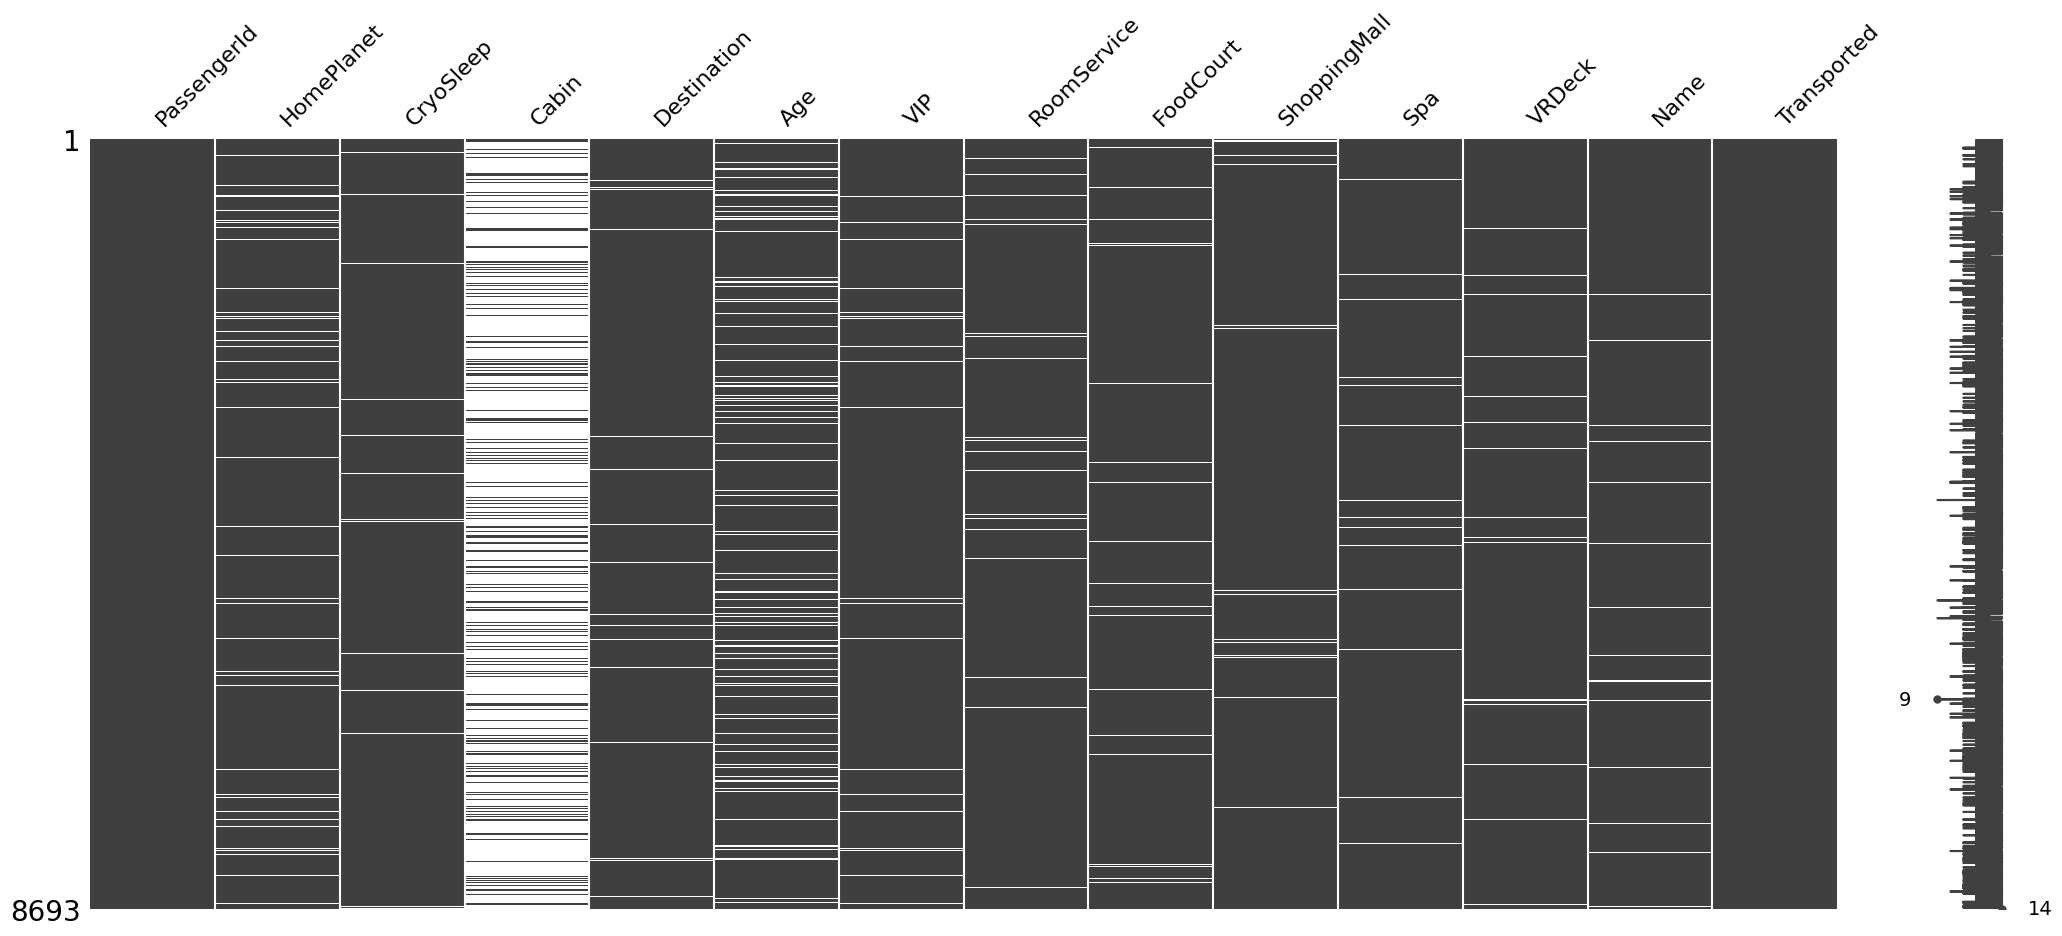

In [12]:
msno.matrix(train)

<Axes: >

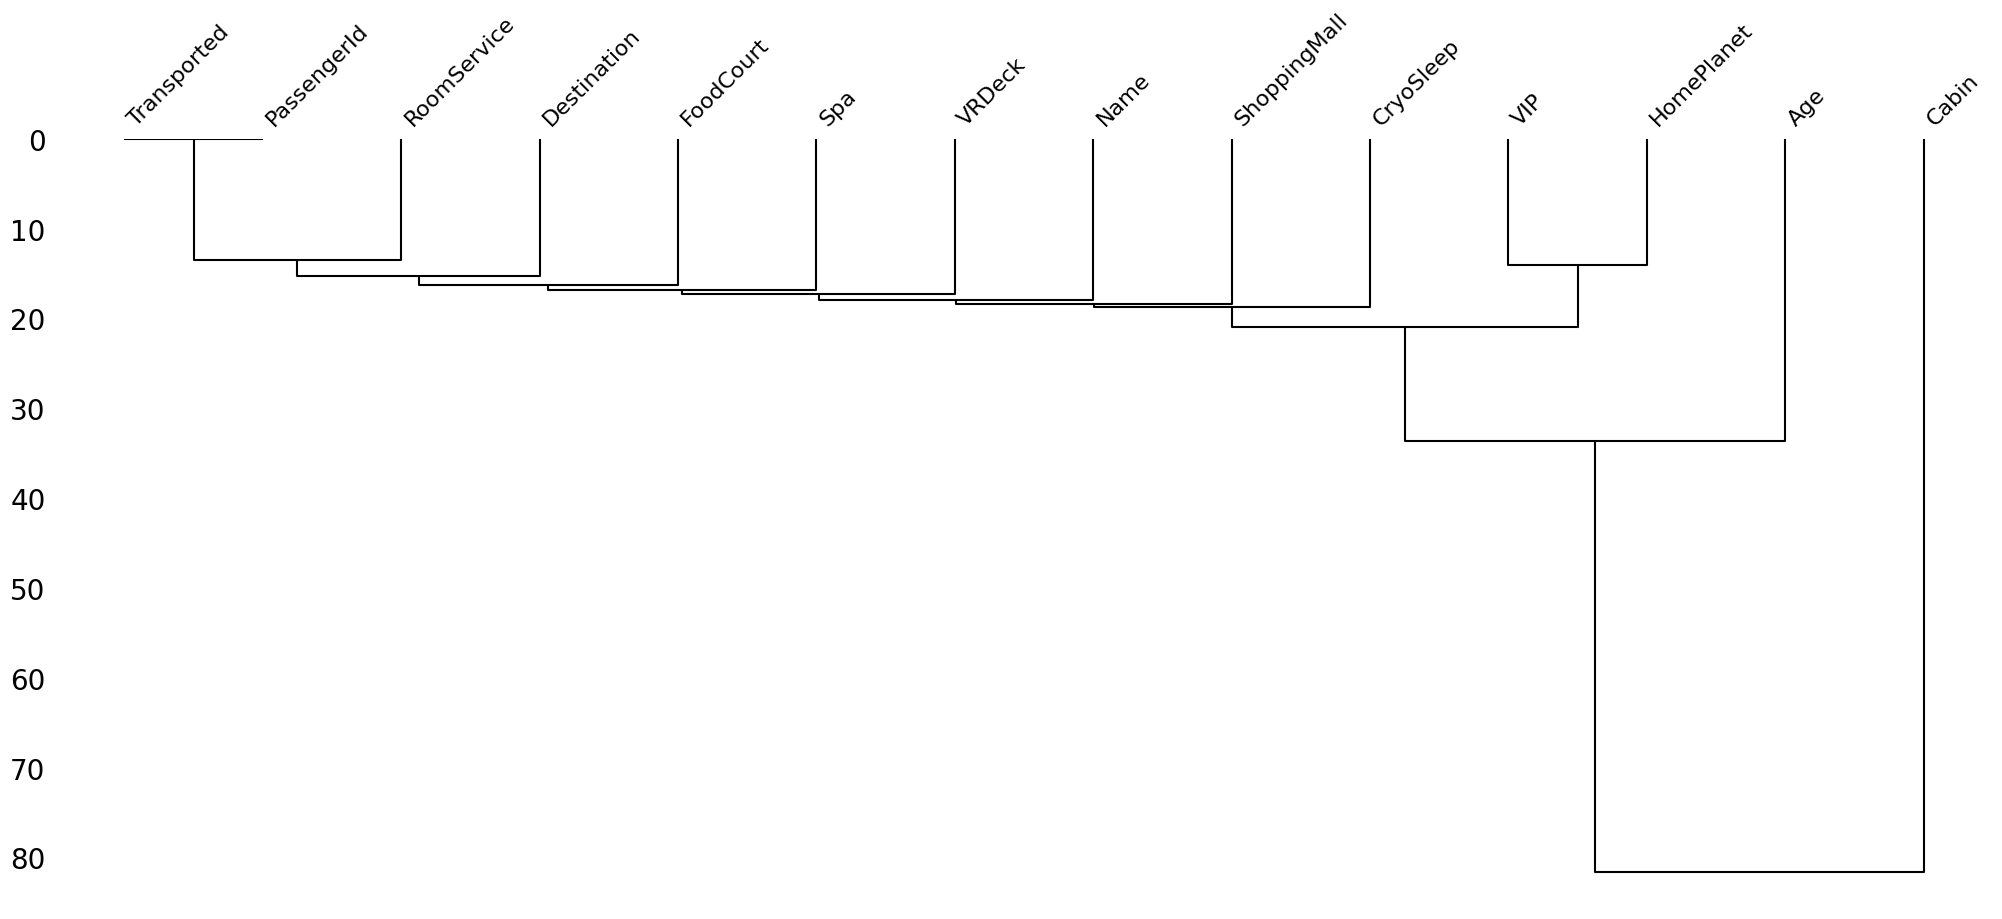

In [13]:
msno.dendrogram(train)

In [14]:
missing_percentage = train.isnull().sum() / len(train) * 100

In [15]:
missing_table=pd.DataFrame({
    'percentage':missing_percentage
})
missing_table

,percentage
PassengerId,0.000000
HomePlanet,4.612907
CryoSleep,2.496261
Cabin,78.235362
Destination,2.093639
Age,11.434488
VIP,2.335212
RoomService,2.082135
FoodCourt,2.105142
ShoppingMall,2.392730


In [16]:
train.shape

(8693, 14)

In [17]:
train=train.drop(columns='Cabin')

In [18]:
train.shape


(8693, 13)

In [19]:
train=train.dropna(subset=['RoomService'],axis=0)

In [20]:
train.isnull().sum()

PassengerId       0
HomePlanet      391
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [21]:
train.shape

(8512, 13)

In [22]:
delte_from_constant = SimpleImputer(strategy='constant', fill_value=0)
train['FoodCourt'] = delte_from_constant.fit_transform(train['FoodCourt'].values.reshape(1, -1)).flatten()

In [23]:
train.isnull().sum()

PassengerId       0
HomePlanet      391
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [24]:
train.HomePlanet.ndim


1

In [25]:
train['HomePlanet']=train['HomePlanet'].astype(str)

In [26]:
delte_from_most_frequent = SimpleImputer(strategy='most_frequent')
train['HomePlanet'] = delte_from_most_frequent.fit_transform(train['HomePlanet'].values.reshape(1, -1)).flatten()


In [27]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [28]:
train.ShoppingMall=train.ShoppingMall.fillna(train.ShoppingMall.mean())

In [29]:
train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

<Axes: ylabel='Frequency'>

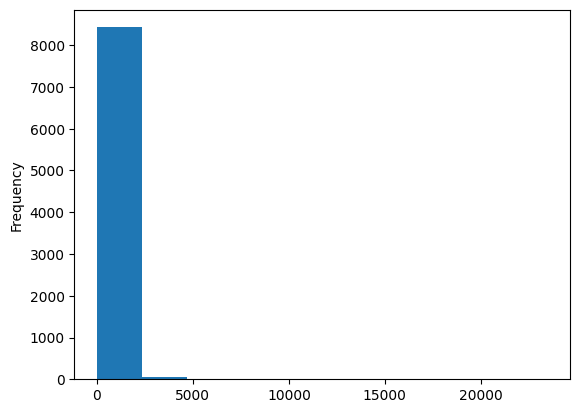

In [30]:

train.ShoppingMall.plot.hist()

In [31]:
scaler=MinMaxScaler()
train['Age']=scaler.fit_transform(train['Age'].values.reshape(-1,1)).flatten()

In [32]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [33]:
imp=KNNImputer(n_neighbors=2)

In [34]:
train['Age']=imp.fit_transform(train['Age'].values.reshape(-1,1)).flatten()

In [35]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [36]:
mice = IterativeImputer()


In [37]:
train['VRDeck']=imp.fit_transform(train['VRDeck'].values.reshape(-1,1)).flatten()

In [38]:
train.isna().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             180
VRDeck            0
Name            199
Transported       0
dtype: int64

In [39]:
train['Age'].value_counts()

Age
0.365052    974
0.303797    286
0.227848    283
0.265823    277
0.291139    260
           ... 
1.000000      3
0.911392      3
0.987342      3
0.962025      2
0.974684      2
Name: count, Length: 81, dtype: int64

In [40]:
train.tail(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8683,9272_02,Earth,False,TRAPPIST-1e,0.265823,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8684,9274_01,nan,True,TRAPPIST-1e,0.291139,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True
8685,9275_01,Europa,False,TRAPPIST-1e,0.000000,False,0.0,0.0,0.0,0.0,0.0,Polaton Conable,True
8686,9275_02,Europa,False,TRAPPIST-1e,0.405063,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,TRAPPIST-1e,0.379747,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,55 Cancri e,0.518987,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,PSO J318.5-22,0.227848,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,TRAPPIST-1e,0.329114,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,55 Cancri e,0.365052,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,TRAPPIST-1e,0.556962,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [41]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5787
55 Cancri e      1771
PSO J318.5-22     775
Name: count, dtype: int64

In [42]:
classes = list(set(train['Destination']))
classes


['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan]

In [43]:
dict={}
for i in range(0,len(classes)):
    dict[classes[i]]=i

dict

{'55 Cancri e': 0, 'PSO J318.5-22': 1, 'TRAPPIST-1e': 2, nan: 3}

In [44]:
imp_encode=LabelEncoder()


In [45]:
train['Destination']=imp_encode.fit_transform(train['Destination'].values.reshape(-1,1)).flatten()

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
train['Destination']

0       2
1       2
2       2
3       2
4       2
       ..
8688    0
8689    1
8690    2
8691    0
8692    2
Name: Destination, Length: 8512, dtype: int64

In [47]:
classes1 = list(set(train['Destination']))
classes1

[0, 1, 2, 3]

In [48]:
train.HomePlanet

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8512, dtype: object

KeyError: 'HomePlanet'